In [1]:
import warnings

warnings.filterwarnings("ignore")

### Carregamento dos Dados não Tratados

In [33]:
import pandas as pd

df = pd.read_csv('../../creditcard.csv')

class_label = df['Class']
df = df.drop(columns=['Class'])

In [46]:
df.shape
df[df.duplicated()].shape
df.dropna(inplace=True)
df = df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283165,171414.0,0.089696,1.222677,0.131305,0.940385,0.811718,0.122753,0.527066,-1.041155,-0.784230,...,0.205304,0.537514,-0.568050,0.139083,0.705197,-1.051533,0.481077,0.078930,0.007529,1.98
283166,171416.0,-0.983129,1.118527,0.807654,-0.592103,0.512843,-0.307039,0.596126,0.426580,-1.048183,...,-0.074815,-0.203017,-0.759487,-0.312025,-0.455505,0.458035,0.415058,-0.153250,-0.049231,1.29
283167,171416.0,-4.036511,-4.116404,1.014058,0.164592,4.415613,-3.324136,-0.416128,-0.563942,0.292513,...,0.735095,-0.059415,-0.536516,0.284077,-0.061619,1.019444,-0.015180,-0.844723,0.456627,133.55
283168,171416.0,1.945731,-0.275007,-1.062573,0.359283,-0.247727,-0.952067,0.066698,-0.150335,0.411245,...,-0.205498,-0.221221,-0.663239,0.320075,0.053940,-0.384809,0.172121,-0.086963,-0.065166,36.18


### Escolha do número de Cluster

In [37]:
from sklearn.cluster import KMeans
from tqdm import tqdm

k_range = range(1, 22)

inertias = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

100%|██████████| 21/21 [01:14<00:00,  3.53s/it]


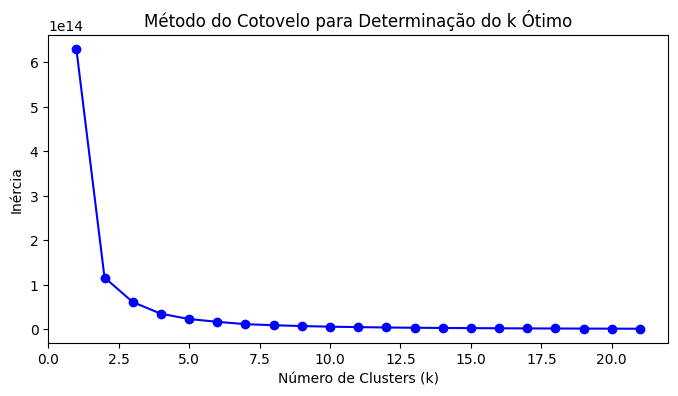

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do k Ótimo')
plt.show()

Vamos utilizar um cálculo para podermos encontrar o valor ótimo do número de clusters. Esse cálculo pode ser encontrado nesse blog [https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9].

In [39]:
from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances

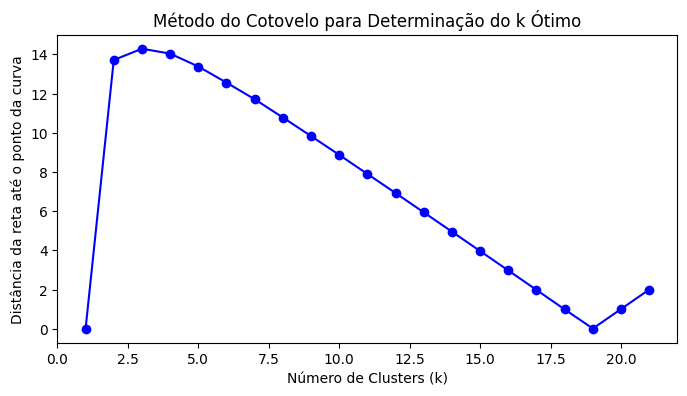

In [40]:
distances = optimal_number_of_clusters(inertias)

plt.figure(figsize=(8, 4))
plt.plot(k_range, distances, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distância da reta até o ponto da curva')
plt.title('Método do Cotovelo para Determinação do k Ótimo')
plt.show()

Vemos que o número ideal de cluster, que possui o maior valor de distância entre a linha e o ponto na curva, é 3. Então podemos trabalhar com 3 clusters para os dados não tratados. Vamos agora testar os nossos hiperparâmetros (random seed) para obter um modelo mais robusto.

In [41]:
import numpy as np

# Definir o número de clusters
k = 3

# Definir o número de inicializações diferentes
num_initializations = 999

best_inertia = np.inf
best_kmeans = None
best_random_seed = None

# Treinar o modelo com diferentes random_seed
for i in tqdm(range(num_initializations)):
    random_seed = i
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(df)
    
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans
        best_random_seed = random_seed

print(f"Melhor random seed: {best_random_seed}")

100%|██████████| 999/999 [17:59<00:00,  1.08s/it]

Melhor random seed: 86


Como resultado, parece que a random seed 728 possui o menor valor de inércia dentro do nosso escopo.

In [20]:
print(f"Inércia: {best_kmeans.inertia_}")

Inércia: 127339406348277.12


Com base nos clusters encontrados usamos o "fit_predict" para que o kmeans classifique cada um dos dados dentro do nosso dataframe dentro dos  clusters encontrados

In [66]:
label = kmeans.fit_predict(df)

print("Clusters encontrados",label)
#Aparentemente foi encontrado o cluster 0 como sendo valores grandes, o cluster 1 sendo valores próximos de 0 e o cluster 2 negativos
print(df[label == 2])

Clusters encontrados [1 1 1 ... 0 0 0]
            Time        V1        V2        V3        V4        V5        V6  \
71935    54503.0  0.995809 -0.030496 -0.049695  1.261054 -0.013675 -0.288243   
71936    54503.0 -2.077801  1.591884  0.153042  1.606362 -0.580726 -0.533075   
71937    54503.0  1.225934 -0.293803  0.987563  0.344647 -0.753643  0.470828   
71938    54504.0 -0.559891 -1.258752 -0.676727 -3.402442  1.048185  3.477664   
71939    54504.0 -1.027995  0.540167  1.193860 -1.297107 -0.131542 -0.699962   
...          ...       ...       ...       ...       ...       ...       ...   
156256  107677.0 -0.681778  0.663974  2.462182 -0.398526  0.258698 -0.190994   
156257  107677.0 -1.638761  0.193164  3.121217  5.121672 -0.750669  2.528040   
156258  107677.0  2.006073 -0.051243 -0.103065  0.635257 -0.485990 -0.643535   
156259  107679.0 -0.518399  1.218123  2.826422  4.332250  0.637097  1.571573   
156260  107681.0 -0.631894  1.294102  0.933836  2.688733  1.217948  0.551976   



E olha só, ao realizar a visualização do nosso dataset clusterizado, podemos perceber claramente outliers, pois o eixo y está sendo montado com base no PCA, enquanto o x com base no Time, no entanto valores do Time se encontram nos mesmos clusters que dentro do PCA, gerando pontos fora da curva!

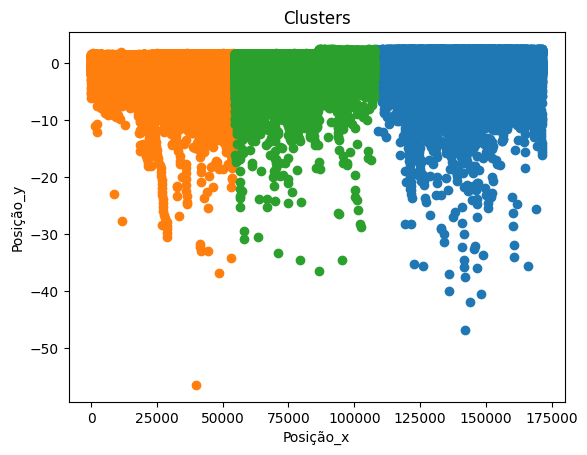

<Figure size 1200x1200 with 0 Axes>

In [69]:
all_labels = np.unique(label)

for i in all_labels:
    plt.scatter(df[label == i].iloc[:, 0], df[label == i].iloc[:, 1], label=f'Cluster {i}')

plt.ylabel('PCA')
plt.xlabel("Time")
plt.title("Clusters")
plt.figure(figsize=(12,12))
plt.show()

In [22]:
# Obter os centróides do melhor modelo
centroids = best_kmeans.cluster_centers_

# Converter os centróides para um DataFrame
centroids_df = pd.DataFrame(centroids, columns=df.columns)

# Salvar os centróides em um arquivo CSV
centroids_df.to_csv('../best_centroids.csv', index=False)

In [23]:
df['cluster'] = best_kmeans.labels_
df['Class'] = class_label

df.to_csv('../creditcard_clusters.csv', index=False)

### Carregamento dos Dados Tratados

In [76]:
import pandas as pd

df = pd.read_csv('../creditcard_treated.csv')

class_label = df['Class']
df = df.drop(columns=['Class'])



In [77]:
df.shape

(563240, 30)

### Escolha do número de Cluster do DF tratado

In [78]:
from sklearn.cluster import KMeans
from tqdm import tqdm

k_range = range(1, 22)

inertias = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

100%|██████████| 21/21 [01:41<00:00,  4.85s/it]


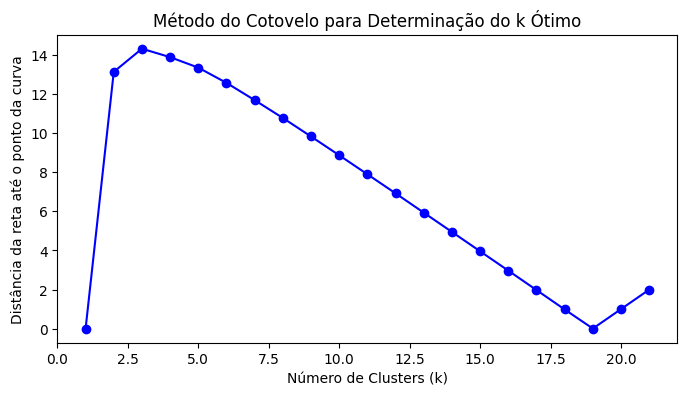

In [79]:
import matplotlib.pyplot as plt

distances = optimal_number_of_clusters(inertias)

plt.figure(figsize=(8, 4))
plt.plot(k_range, distances, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distância da reta até o ponto da curva')
plt.title('Método do Cotovelo para Determinação do k Ótimo')
plt.show()

Parece que se manteve o mesmo número ideal de clusters... Viva! E o hiperparâmetro?

In [80]:
import numpy as np
# Definir o número de clusters
k = 3

# Definir o número de inicializações diferentes
num_initializations = 999

best_inertia = np.inf
best_kmeans = None
best_random_seed = None

# Treinar o modelo com diferentes random_seed
for i in tqdm(range(num_initializations)):
    random_seed = i
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(df)
    
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans
        best_random_seed = random_seed

print(f"Melhor random seed: {best_random_seed}")

  0%|          | 2/999 [00:04<40:18,  2.43s/it]


KeyboardInterrupt: 

Opa! Mudou... (Caso vc so queira o melhor dataset sem esperar 30 min, random_state = 823)

In [82]:
print(f"Inércia: {best_kmeans.inertia_}")

Inércia: 125640261224573.42


A inércia está muito mais alta em comparação, o que parece fazer sentido como o volume dos dados dobrou.(SMOTE)

In [85]:
label = kmeans.fit_predict(df)

print("Clusters encontrados",label)
#Aparentemente foi encontrado o cluster 0 como sendo valores grandes, o cluster 1 sendo valores próximos de 0 e o cluster 2 negativos
print(df[label == 1])

Clusters encontrados [0 0 0 ... 0 0 2]
                 Time        V1        V2        V3        V4        V5  \
157591  111083.000000  1.855876 -0.528715  0.136391  1.227645 -0.683445   
157592  111086.000000 -0.619589  0.574291 -0.195893  1.348123  0.456957   
157593  111087.000000 -0.200371 -0.015764 -0.058925 -0.520027  1.543060   
157594  111087.000000 -0.075474  0.103926  0.725494  1.074052  0.863310   
157595  111089.000000  2.104037  0.065442 -1.428655  0.323540  0.393572   
...               ...       ...       ...       ...       ...       ...   
563226  129607.655226 -2.294471  2.087198 -5.844912  2.864064 -0.809834   
563227  137826.483421 -0.431469  1.383718 -5.531483  2.034940 -1.676173   
563228  143436.589823 -4.365572  1.403825 -4.999829  3.329674  0.318717   
563230  134902.969571  0.170720  1.204055 -3.922186  4.047616 -2.312621   
563235  154021.180123 -6.151978 -1.487382 -4.893660  2.896103  0.463398   

              V6        V7        V8        V9  ...       V2

Podemos perceber pelos gráficos agora com SMOTE que a classificação dos clusters não alterou absurdamente

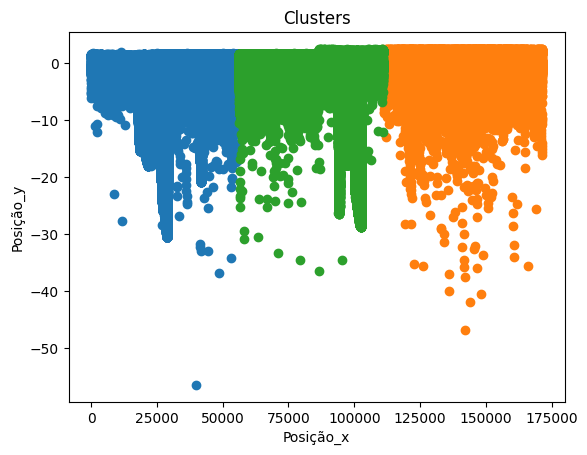

<Figure size 1200x1200 with 0 Axes>

In [86]:
all_labels = np.unique(label)

for i in all_labels:
    plt.scatter(df[label == i].iloc[:, 0], df[label == i].iloc[:, 1], label=f'Cluster {i}')

plt.ylabel('PCA')
plt.xlabel("Time")
plt.title("Clusters")
plt.figure(figsize=(12,12))
plt.show()

In [13]:
# Obter os centróides do melhor modelo
centroids = best_kmeans.cluster_centers_

# Converter os centróides para um DataFrame
centroids_df = pd.DataFrame(centroids, columns=df.columns)

# Salvar os centróides em um arquivo CSV
centroids_df.to_csv('../best_centroids_df_treated.csv', index=False)

In [15]:
df['cluster'] = best_kmeans.labels_
df['Class'] = class_label

df.to_csv('../creditcard_treated_clusters.csv', index=False)

In [19]:
import pandas as pd

df = pd.read_csv('../creditcard_treated_clusters.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,cluster,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239370,0,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.424901,0,0.0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.274860,0,0.0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.121281,0,0.0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.120637,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563235,154021.180123,-6.151978,-1.487382,-4.893660,2.896103,0.463398,-3.166797,-4.169978,1.524096,-1.890787,...,-0.994378,0.313069,-0.243100,-0.165280,1.236037,-0.669807,-0.585297,0.261710,1,1.0
563236,48359.577927,-2.649776,-1.334328,0.885839,1.926523,-0.141272,-0.539475,0.653850,-0.317152,0.519650,...,0.414452,0.741434,0.420443,0.258677,-0.133946,0.081950,0.354275,0.463942,0,1.0
563237,41202.923605,-8.372807,6.105246,-11.622985,6.699396,-8.100926,-3.714798,-12.366592,5.574975,-6.222133,...,-0.279497,0.009196,0.403336,-0.020379,0.523873,0.819582,0.075949,-0.303293,0,1.0
563238,41567.118936,-1.956009,1.740479,-1.227773,2.789663,-1.863577,-0.246224,-2.990720,1.266762,-1.507698,...,0.529681,-0.139876,0.151106,0.074212,-0.161577,0.386903,0.019372,-0.260275,0,1.0


### Utilizando Autoencoders para Reduzir a dimensionalidade antes de utilizar o Kmeans

In [87]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Model


df_autoencoder = pd.read_csv('../creditcard_treated_clusters.csv')


In [88]:
X_train, X_test = train_test_split(df_autoencoder, test_size=0.3, random_state=42)

X_test, X_val = train_test_split(X_test, test_size=0.5, random_state=42)

input = layers.Input(shape=(X_train.shape[1],))

encoded = layers.Dense( units = 32, activation = "relu")(input)

decoded = layers.Dense( units = 32, activation = "sigmoid")(encoded)

autoencoder = keras.Model(input, decoded)
autoencoder.compile(optimizer = "adam",loss = "binary_crossentropy", metrics = ["accuracy"])
autoencoder.summary()

autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32, validation_data = (X_test, X_test))

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,112 (8.25 KB)

 Trainable params: 2,112 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 9s 693us/step - accuracy: 0.9328 - loss: -137350627328.0000 - val_accuracy: 1.0000 - val_loss: -1065833725952.0000
Epoch 2/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 8s 675us/step - accuracy: 1.0000 - loss: -1624137400320.0000 - val_accuracy: 1.0000 - val_loss: -3754411163648.0000
Epoch 3/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 9s 701us/step - accuracy: 1.0000 - loss: -4714448027648.0000 - val_accuracy: 1.0000 - val_loss: -8099230384128.0000
Epoch 4/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 9s 695us/step - accuracy: 1.0000 - loss: -9535879118848.0000 - val_accuracy: 1.0000 - val_loss: -14380881149952.0000
Epoch 5/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 8s 678us/step - accuracy: 1.0000 - loss: -16317198368768.0000 - val_accuracy: 1.0000 - val_loss: -22836651491328.0000
Epoch 6/20
12321/12321 ━━━━━━━━━━━━━━━━━━━━ 9s 694us/step - accuracy: 1.0000 - loss: -25311943065600.0000 - val_accuracy: 1.0000 - val_loss: -33581495746560.0000
Epoch 7/20
12321/12321 ━━━━━━━━━━━━━

In [89]:
loss_train = autoencoder.evaluate(X_train, X_train)
loss_test = autoencoder.evaluate(X_test, X_test)
loss_val = autoencoder.evaluate(X_val, X_val)

print("Perda no conjunto de treinamento:", loss_train)
print("Perda no conjunto de validação:", loss_val)
print("Perda no conjunto de teste:", loss_test)

12321/12321 ━━━━━━━━━━━━━━━━━━━━ 6s 499us/step - accuracy: 1.0000 - loss: -444935895515136.0000
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 1.0000 - loss: -446387493797888.0000
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 1.0000 - loss: -444500694532096.0000
Perda no conjunto de treinamento: [-445834013442048.0, 0.9999923706054688]
Perda no conjunto de validação: [-446757062311936.0, 0.9999881386756897]
Perda no conjunto de teste: [-446707972177920.0, 1.0]


In [90]:
encoder_model = Model(input,encoded)

X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)


12321/12321 ━━━━━━━━━━━━━━━━━━━━ 6s 502us/step
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step


Utilizando Kmeans para clusterizar os dados após reduzir sua dimensinalidade utilizando Autoencoders

In [91]:
from sklearn.cluster import KMeans
from tqdm import tqdm

k_range = range(1, 22)

inertias = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_encoded)
    inertias.append(kmeans.inertia_)

100%|██████████| 21/21 [01:34<00:00,  4.50s/it]


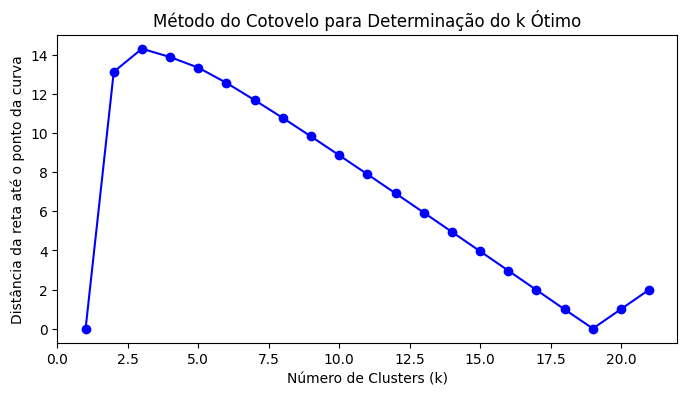

In [92]:
import matplotlib.pyplot as plt

distances = optimal_number_of_clusters(inertias)

plt.figure(figsize=(8, 4))
plt.plot(k_range, distances, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distância da reta até o ponto da curva')
plt.title('Método do Cotovelo para Determinação do k Ótimo')
plt.show()

In [93]:
import numpy as np

# Definir o número de clusters
k = 3

# Definir o número de inicializações diferentes
num_initializations = 999

best_inertia = np.inf
best_kmeans = None
best_random_seed = None

# Treinar o modelo com diferentes random_seed
for i in tqdm(range(num_initializations)):
    random_seed = i
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(df)
    
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans
        best_random_seed = random_seed

print(f"Melhor random seed: {best_random_seed}")

  0%|          | 1/999 [00:02<48:28,  2.91s/it]


KeyboardInterrupt: 

Caso você queira rodar o kMeans com o melhor random state = 823

Calculando a Inércia, percebemos que teve uma melhora de 000000000135734.53, em relação a anterior(sem autoencoders), isso pode ser devido ao fato de que o PCA já 
havia sido aplicado nos dados

In [95]:
print(f"Inércia: {best_kmeans.inertia_}")

Inércia: 125640261224573.42


In [96]:
label = kmeans.fit_predict(df)

print("Clusters encontrados",label)
#Aparentemente foi encontrado o cluster 0 como sendo valores grandes, o cluster 1 sendo valores próximos de 0 e o cluster 2 negativos
print(df[label == 1])

Clusters encontrados [0 0 0 ... 0 0 2]
                 Time        V1        V2        V3        V4        V5  \
157591  111083.000000  1.855876 -0.528715  0.136391  1.227645 -0.683445   
157592  111086.000000 -0.619589  0.574291 -0.195893  1.348123  0.456957   
157593  111087.000000 -0.200371 -0.015764 -0.058925 -0.520027  1.543060   
157594  111087.000000 -0.075474  0.103926  0.725494  1.074052  0.863310   
157595  111089.000000  2.104037  0.065442 -1.428655  0.323540  0.393572   
...               ...       ...       ...       ...       ...       ...   
563226  129607.655226 -2.294471  2.087198 -5.844912  2.864064 -0.809834   
563227  137826.483421 -0.431469  1.383718 -5.531483  2.034940 -1.676173   
563228  143436.589823 -4.365572  1.403825 -4.999829  3.329674  0.318717   
563230  134902.969571  0.170720  1.204055 -3.922186  4.047616 -2.312621   
563235  154021.180123 -6.151978 -1.487382 -4.893660  2.896103  0.463398   

              V6        V7        V8        V9  ...       V2

O uso de autoencoders não foi tão benefico para esse conjunto de dados, como pode ser observado na imagem

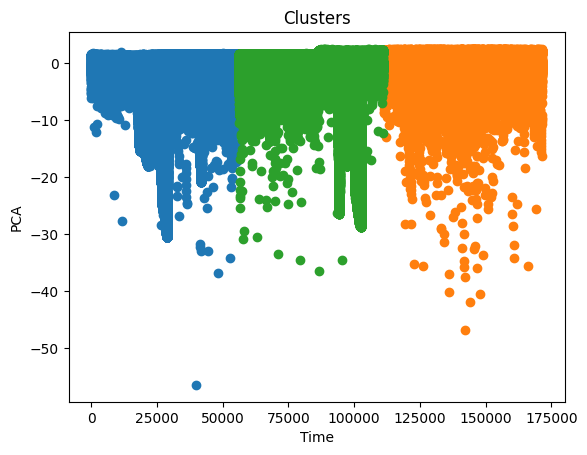

<Figure size 1200x1200 with 0 Axes>

In [98]:
all_labels = np.unique(label)

for i in all_labels:
    plt.scatter(df[label == i].iloc[:, 0], df[label == i].iloc[:, 1], label=f'Cluster {i}')

plt.ylabel('PCA')
plt.xlabel("Time")
plt.title("Clusters")
plt.figure(figsize=(12,12))
plt.show()

In [97]:
# Obter os centróides do melhor modelo
centroids = best_kmeans.cluster_centers_

# Converter os centróides para um DataFrame
centroids_df = pd.DataFrame(centroids, columns=df.columns)

# Salvar os centróides em um arquivo CSV
centroids_df.to_csv('../best_centroids_df_treated_autoencoders.csv', index=False)

In [31]:
df['cluster'] = best_kmeans.labels_
df['Class'] = class_label

df.to_csv('../creditcard_treated_clusters_autoencoders.csv', index=False)